**TITLE:**
DSCI PROJECT

**INTRO:**

-> background + question 

DSCI100 is a course that introduces students to organization of data through code. Throughout the semester, numerous tools in the R programming language are taught, some of which allow for data to be visualized and others that help data get sorted into much more interpretable forms. To demonstrate these tools and skills gained. Generous peers from the earlier semesters compiled a data frame which we can now use to develop some questions we may have about video games and their audience. The data frame that will be used includes information about the players' experience, subscription to a games related newsletter, hashed email, played hours, name, gender, and age. A research question that may arise from this set of data may be "Can age and hours played predict whether or not that person is subscribed to a game related newsletter?"

-> data description

In order to utilize the data, we can first select the columns of data that are actually relevant to the question which in this case, would be  "Age", "played_hours", and "subscribe". "Age" and "played_hours" act as explanatory variables while "subscribe" will be the response variable. Following the selection of our data, we should change our non numerical data in to factors (fct). In the original data set, the column "subcribe" is in identified as a string of characters (chr), to change this, the column can be mutated using as_factor() to convert the values into factors (fct). Making this change allows the program to properly identify "subscribe" as a category with a fixed set of groups instead of a set of continuous values. As for "played_hours" and "Age", they can stay as double (dbl) values which is meant for numeric values.

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)

data <- read_csv("https://raw.githubusercontent.com/drsqs257/dsci-project/refs/heads/main/players.csv") |>
    select(subscribe, played_hours, Age) |>
    mutate(subscribe = as_factor(subscribe))
head(data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


Within the data to be used certain information about the data frame can be collected to help familiarize ourselves with the data. Let's take the number of observations/students into account. 

In [4]:
total_number_of_students_in_data <- nrow(data)
total_number_of_students_in_data 

[1] 196

Other pieces of information we can extract include things like the mean hours played across all the participants 

In [9]:
mean_hours <- data |>
    summarise(mean_hours = mean(played_hours))
mean_hours

mean_hours
<dbl>
5.845918


or the mean age.

In [10]:
mean_age <- data |>
    filter(Age != 'NA') |>
    summarise(mean_age = mean(Age))
mean_age

mean_age
<dbl>
20.52062


**METHOD**

-> data frame:

Thanks to how the data has been selected and mutated, all necesarry columns have already been collected and all unnecessary columns are removed. From here, we can create a simple visualization to see how this data looks so far. While making this plot, it should also be noted that the "hours" are log scaled because the wide-ranging values. Scaling it will make the model more stable and outliers less dominating.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


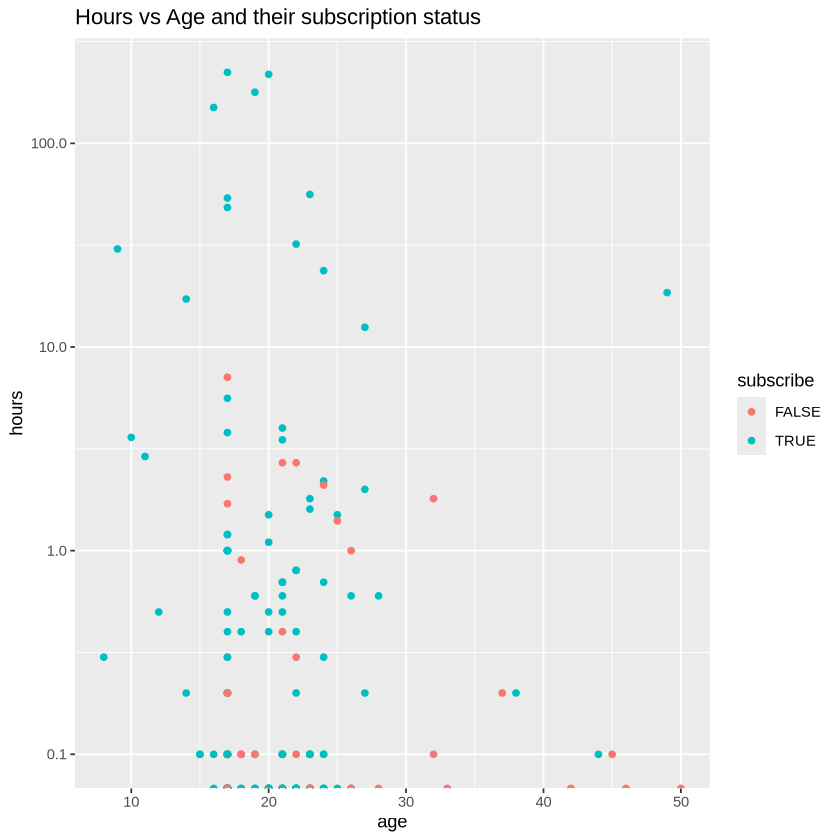

In [12]:
exp_plot <- data |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point()+
    labs(x = "age" , y = "hours", color = "subscribe", title = "Hours vs Age and their subscription status") +
    scale_y_log10()
exp_plot

Now, to actually attempt to answer the research question at hand, it will be approached as any other KNN classification problem we've ever seen. 


describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
loads data 
wrangles and cleans the data to the format necessary for the planned analysis
performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
performs the data analysis. For your analysis, you should think about and provide a brief explanation of the following questions:
Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How did you compare and select the model?
Note: you should also think about the following:
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
creates a visualization of the analysis 
note: all figures should have a figure number and a legend


In [27]:
data_split <- initial_split(data)
data_train <- training(data_split)
data_test <- testing(data_split)

data_recipe <- recipe(subscribe ~ Age + played_hours, data = data_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
    set_engine("kknn") |>
    set_mode("classification")

vfold <- vfold_cv(data_train, v = 4, strata = subscribe)

player_resample_fit <- workflow() |>
    add_recipe(data_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = vfold)

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 34 rows.
               ✖ Assigned data has 36 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 36 to size 34.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





In [ ]:



train_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(knn_spec) |>
    fit(data_train)

predict_test <- predict(train_fit, data_test)
predict_test